# Optimal Parameters for IllustrisTNG
Optimize for $\log_{10}\mathrm{N_{Ia}}$.

Set $\tau_\mathrm{Ia}$ to 40Myr + let SSP parameters vary freely

Include $\beta$ error model here and use mass range 8-100 or 8-40 Msun for CC-SN (no 'failed-SNe')

In [ ]:
%pylab inline
from Chempy.wrapper import single_star_optimization

## SN2 $\mathrm{M_{max}} = 40\mathrm{M_\odot}$

In [4]:
single_star_optimization()

In [9]:
# %load init.ipy
%pylab inline
from Chempy.parameter import ModelParameters
a = ModelParameters()
from Chempy.score_function import preload_params_mcmc
preload = preload_params_mcmc()

if a.sn2mmax != 40:
    raise Exception('Set SN2 Mmax to 40')

Populating the interactive namespace from numpy and matplotlib


Exception: Set SN2 Mmax to 40

In [40]:
from Chempy.plot_mcmc import restructure_chain
restructure_chain('TNG40/')

print('\n --------------------------- \n')
print('Best MCMC Parameters')
positions = np.load('TNG40/posteriorPDF.npy')
med = np.median(positions,axis=0)
up = np.percentile(positions,100-15.865,axis=0)
low = np.percentile(positions,15.865,axis=0)
for i in range(5):
    print('&$%.2f$&$^&^{+%.2f}_{-%.2f}$' %(med[i],up[i]-med[i],med[i]-low[i]))

blob shape =  (64, 303, 7, 1) probably some runs did not return results and were stored anyway.
The chain has a length of 303 iterations, each iteration having 64 evaluations/walkers
Mean posteriors at the beginning and the end of the chain:
1.47866337752 3.32808367075
Mean posteriors after the burn-in tail is cut out:
1.47866337752 1.18085843436
We are left with a sample of 4992 posterior evaluations from the converged MCMC chain
We have 4992 iterations good enough posterior, their posteriors range from
4.00228943562 -8.1524419551
Highest posterior was obtained at parameters:  [[ 0.92791375 -2.67111416 -0.62370973  0.5384251   0.54460557]]
Number of unique posterior values:  2754
Inferred marginalized parameter distributions are:
0 0.736616469286 +- 0.344944236988
1 -2.69499792297 +- 0.131469386569
2 -0.507771202024 +- 0.280656319116
3 0.580138527727 +- 0.0952670957236
4 0.530255557144 +- 0.0969626636974

 --------------------------- 

Best MCMC Parameters
&$0.76$&$^&^{+0.32}_{-0.38}$

Populating the interactive namespace from numpy and matplotlib


/home/philcox/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


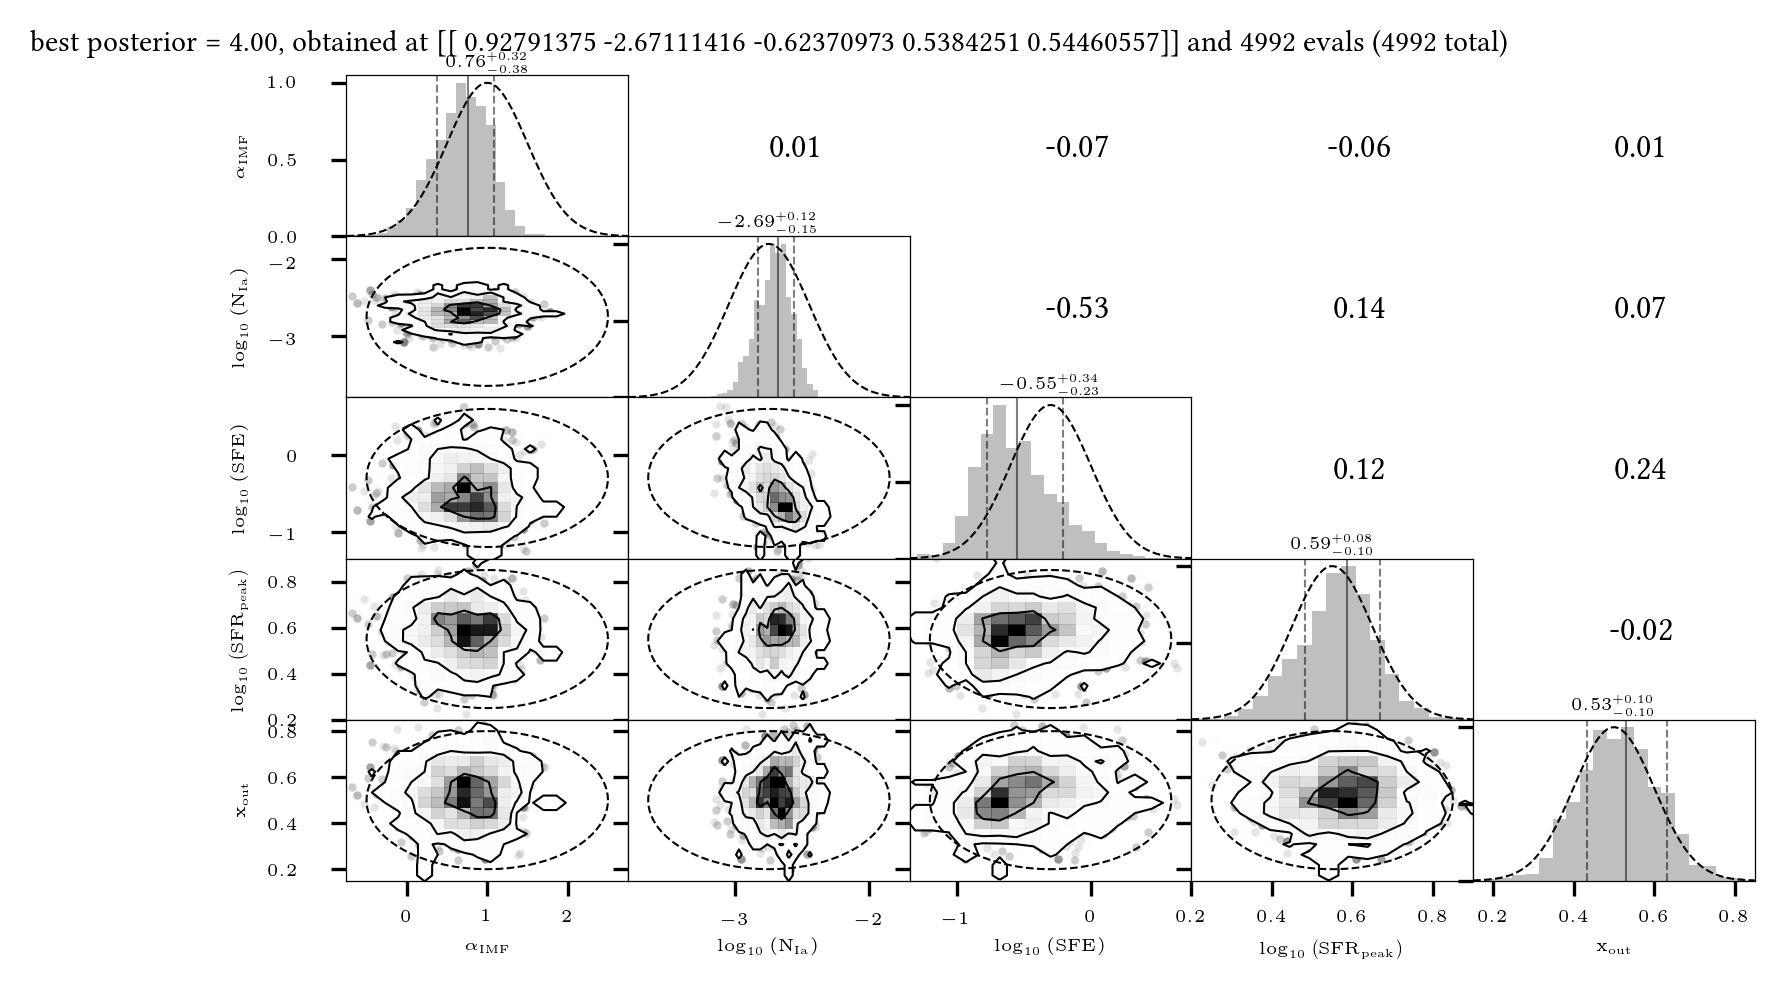

In [33]:
%pylab inline
from Chempy.plot_mcmc import plot_mcmc_chain_with_prior
plot_mcmc_chain_with_prior('TNG40/',use_prior=True,only_first_star=False,plot_true_parameters=False,plot_only_SSP_parameter=False)
plt.savefig('TNG40/40Corner.png')

## SN2 $\mathrm{M_{max}} = 100\mathrm{M_\odot}$

In [2]:
# %load init.ipy
%pylab inline
from Chempy.parameter import ModelParameters
a = ModelParameters()
from Chempy.score_function import preload_params_mcmc
preload = preload_params_mcmc()

if a.sn2mmax != 100:
    raise Exception('Set SN2 Mmax to 100')

Populating the interactive namespace from numpy and matplotlib


Exception: Set SN2 Mmax to 100

In [ ]:
single_star_optimization()

In [3]:
from Chempy.plot_mcmc import restructure_chain
restructure_chain('TNG100/')

blob shape =  (64, 303, 7, 1) probably some runs did not return results and were stored anyway.
The chain has a length of 303 iterations, each iteration having 64 evaluations/walkers
Mean posteriors at the beginning and the end of the chain:
0.832162289598 1.31984856712
Mean posteriors after the burn-in tail is cut out:
0.832162289598 1.34611604044
We are left with a sample of 4992 posterior evaluations from the converged MCMC chain
We have 4992 iterations good enough posterior, their posteriors range from
3.41841437694 -6.96721950445
Highest posterior was obtained at parameters:  [[ 0.74704068 -2.63598995 -0.24725058  0.58601661  0.53968136]]
Number of unique posterior values:  2750
Inferred marginalized parameter distributions are:
0 0.766321634676 +- 0.330943093362
1 -2.63527292743 +- 0.134301464995
2 -0.322348577455 +- 0.311132367793
3 0.574292236254 +- 0.0998450942023
4 0.54136567504 +- 0.101881435777


Populating the interactive namespace from numpy and matplotlib


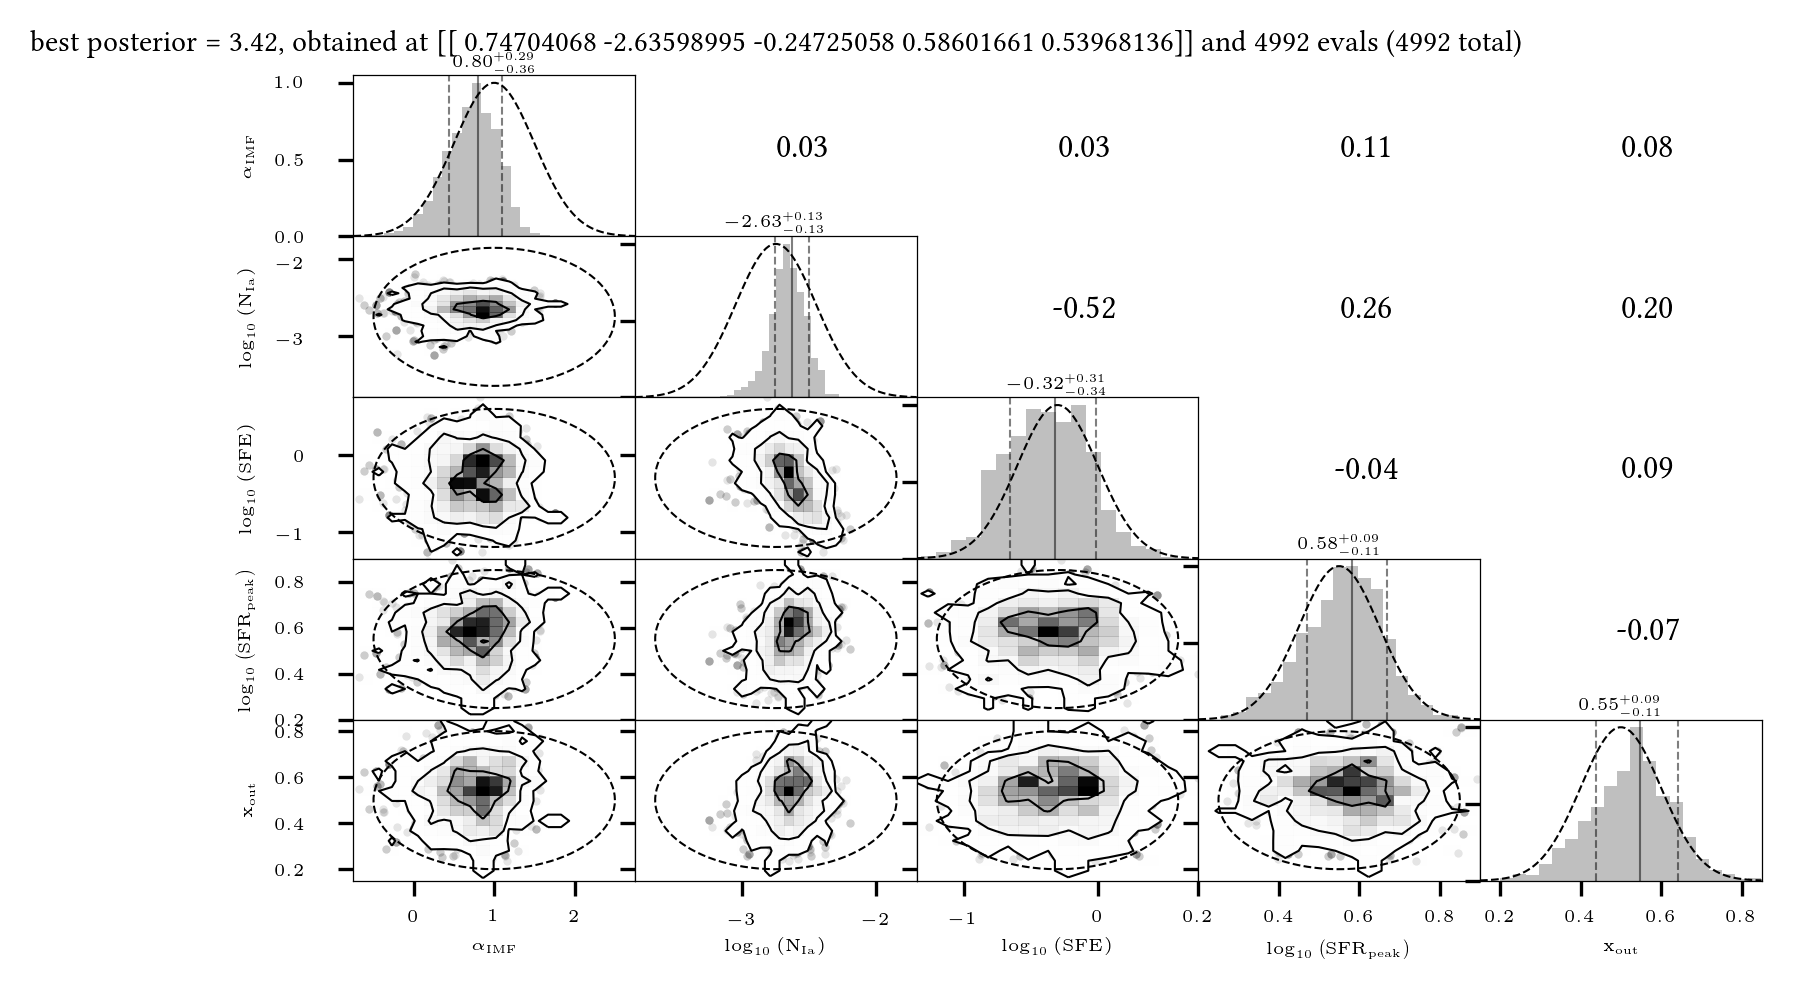

In [35]:
%pylab inline
from Chempy.plot_mcmc import plot_mcmc_chain_with_prior
plot_mcmc_chain_with_prior('TNG100/',use_prior=True,only_first_star=False,plot_true_parameters=False,plot_only_SSP_parameter=False)
plt.savefig('TNG100/100Corner.png')

In [41]:
print('\n --------------------------- \n')
print('Best MCMC Parameters')
positions = np.load('TNG100/posteriorPDF.npy')
med = np.median(positions,axis=0)
up = np.percentile(positions,100-15.865,axis=0)
low = np.percentile(positions,15.865,axis=0)
for i in range(5):
    print('&$%.2f$&$^{+%.2f}_{-%.2f}$' %(med[i],up[i]-med[i],med[i]-low[i]))


 --------------------------- 

Best MCMC Parameters
&$0.80$&$^{+0.29}_{-0.36}$
&$-2.63$&$^{+0.13}_{-0.13}$
&$-0.32$&$^{+0.31}_{-0.34}$
&$0.58$&$^{+0.09}_{-0.11}$
&$0.55$&$^{+0.09}_{-0.11}$


## Plot predictions for both

In [37]:
dat40 = np.load('TNG40/Hogg_normalised_element_predictions_TNG_net.npz')
elements = dat40['elements']
dat100 = np.load('TNG100/Hogg_normalised_element_predictions_TNG_net.npz')

data_list = [dat40,dat100]
means = [dat['mean'] for dat in data_list]
sigmas = [dat['sigma'] for dat in data_list]

dat40.close()
dat100.close()

colors = ['r','b']
shapes = ['v', 'o']
names = [r'$\mathrm{M_{SN2,max}} = 40\mathrm{M_\odot}$',r'$\mathrm{M_{SN2,max}} = 100\mathrm{M_\odot}$']

In [38]:
#  Reorder
alpha_names = ['He','C','N','O','Ne','Mg','Si','Fe']

alphamean,alphasigma = [],[]
for i in range(len(data_list)):
    meanmean = np.mean(means[i],axis=0)
    meansigma = np.mean(sigmas[i],axis=0)
    re_mean,re_sig,re_MCMC = [],[],[]
    for j in range(len(alpha_names)):
        for k in range(len(elements)):
            if alpha_names[j] == elements[k]:
                re_mean.append(meanmean[k])
                re_sig.append(meansigma[k])
    alphamean.append(re_mean)
    alphasigma.append(re_sig)
    
# Load in proto-solar data
ps_dat = np.load('Chempy/input/stars/Proto-sun_all.npy')
ps_nam = ps_dat.dtype.names
ps_abun = []; ps_err = []
for el in alpha_names:
    for i in range(len(ps_nam)):
        if ps_nam[i] == el:
            ps_abun.append(ps_dat[0][i])
            ps_err.append(ps_dat[1][i])
            
            

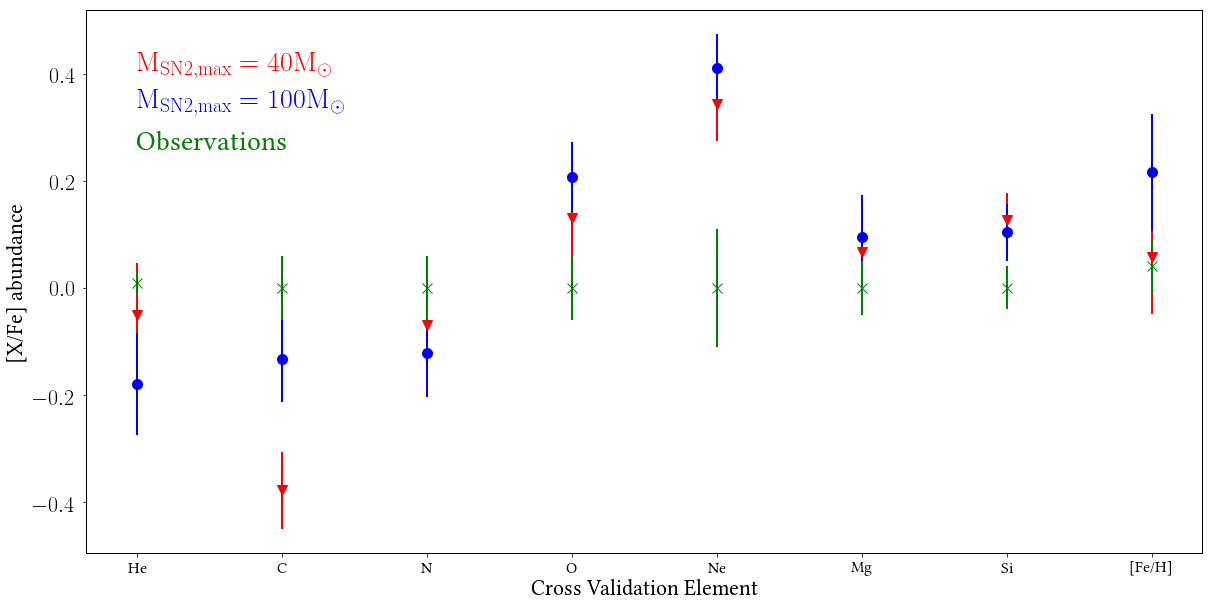

In [55]:
plt.figure(figsize=(20,10))
large_text = 28
text_size = 22
marker_size= 10
plt.rc('font', family='serif',size = large_text)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 2)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
    'font.family' : 'libertine',
    'text.latex.unicode': True,
    }
plt.rcParams.update(params)

plt.figure(figsize=(20,10))
large_text = 28
text_size = 22
marker_size= 10
small_text = 16
plt.rc('font', family='serif',size = large_text)
plt.rc('xtick', labelsize=small_text)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 2)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
    'font.family' : 'libertine',
    'text.latex.unicode': True,
    }
plt.rcParams.update(params)

xtext = 0
ytext = 0.4
ytextgap = 0.07


for i in range(len(data_list)):
    plt.errorbar(np.arange(len(alpha_names)),alphamean[i],yerr=alphasigma[i],c=colors[i],fmt=shapes[i],ms=marker_size)
    plt.text(xtext,ytext-ytextgap*i,names[i],color=colors[i])

plt.errorbar(np.arange(len(alpha_names)),ps_abun,yerr=ps_err,c='g',ms=marker_size,fmt='x')
plt.text(xtext,ytext-ytextgap*2,'Observations',color='g')

plt.ylabel('[X/Fe] abundance')
plt.xlabel('Cross Validation Element')
#plt.legend(loc='upper right',)
ax=plt.gca()
#elements = alpha_names.astype("<U6")
for e,el in enumerate(alpha_names):
    if el == 'Fe':
        alpha_names[e] = '[Fe/H]'
la=plt.setp(ax,xticks=np.arange(len(alpha_names)), xticklabels=alpha_names)

plt.savefig('PaperPlots/BothPredictions.pdf',dpi=300,bbox_inches='tight')

In [43]:
dat40 = np.load('TNG40/Hogg_normalised_element_predictions_TNG_net.npz')
elements = dat40['elements']
dat100 = np.load('TNG100/Hogg_normalised_element_predictions_TNG_net.npz')



KeyError: 'score is not a file in the archive'

In [47]:
norm = [dat['normalised_scores'] for dat in data_list]

In [52]:
print(np.median(norm,axis=1))
print(np.percentile(norm,100-15.865,axis=1)-np.median(norm,axis=1))
print(np.median(norm,axis=1)-np.percentile(norm,15.865,axis=1))

[-0.20019154 -0.15434101]
[ 0.02620113  0.01878709]
[ 0.01971335  0.00558727]
